# Analyse pandas Multi files

Purpose detection of bad files

work with Weakly_2023_11
- use jupyter kernel LSST
- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2023/04/06
- last update : 2023/04/06


In [1]:
import h5py

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import matplotlib.dates as mdates
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

In [3]:
import seaborn as sns
sns.set_style("ticks",{'axes.grid' : True})
#sns.set(rc={'figure.figsize':(16,16)})

In [4]:
import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd
pd.options.display.max_columns = None

plt.rcParams["figure.figsize"] = (8,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [5]:
from astropy.time import Time
import astropy.units as u

In [6]:
DateToRuncollection = {

 # september 2022
 #20220912 :  "u/dagoret/BPS_manyspectro_v60", # Missing collection
 #20220913 :  "u/dagoret/BPS_manyspectro_v61", # Missing collection
 #20220914 :  "u/dagoret/BPS_manyspectro_v62", # Missing collection  
 20220927 :  "u/dagoret/BPS_manyspectro_v63", # Mount errors available, mitigé
 20220928 :  "u/dagoret/BPS_manyspectro_v64", # Mount errors available, very nice spectra
 20220929 :  "u/dagoret/BPS_manyspectro_v65", # Mount errors available, very nice spectra
      
    
 # october 2022
 20221012 :  "u/dagoret/BPS_manyspectro_v56", # mount errors , nice
 20221025 :  "u/dagoret/BPS_manyspectro_v57", # mount errors, very bad spectra
 20221026 :  "u/dagoret/BPS_manyspectro_v58", # mount errors,  nice spectra
 20221027 :  "u/dagoret/BPS_manyspectro_v59", # mount errors,  nice spectra
    
 # november 2022
 20221109 :  "u/dagoret/BPS_manyspectro_v53", # nice
 20221110 :  "u/dagoret/BPS_manyspectro_v54", # mount errors available, many bad rec spectra
 20221123 :  "u/dagoret/BPS_manyspectro_v55", # mount errors , nice   
    
 # december 2022   
 20221207 :  "u/dagoret/BPS_manyspectro_v48",
 20221208 :  "u/dagoret/BPS_manyspectro_v49",
 20221209 :  "u/dagoret/BPS_manyspectro_v50", 
 20221210 :  "u/dagoret/BPS_manyspectro_v51", 
 20221212 :  "u/dagoret/BPS_manyspectro_v52",    
    
 #January 2023
 20230117 :  "u/dagoret/BPS_manyspectro_v79", # no mount errors
 20230118 :  "u/dagoret/BPS_manyspectro_v80", # no mount
 20230119 :  "u/dagoret/BPS_manyspectro_v77", # missing for moment
 #20230131 :  "u/dagoret/BPS_manyspectro_v78", # missing for moment


 # february 2023
 20230214 :  "u/dagoret/BPS_manyspectro_v42",
 20230215 :  "u/dagoret/BPS_manyspectro_v43", # mount errors
 20230216 :  "u/dagoret/BPS_manyspectro_v44", # mount errors 
 20230228 :  "u/dagoret/BPS_manyspectro_v70",   
 
 # march 2023  
 20230301 :  "u/dagoret/BPS_manyspectro_v71", 
 20230302 :  "u/dagoret/BPS_manyspectro_v72", 
 20230315 :  "u/dagoret/BPS_manyspectro_v73", # mount errors
 20230316 :  "u/dagoret/BPS_manyspectro_v74", # mount errors   
    
}

In [7]:
List_of_dates = list(DateToRuncollection.keys()) 
NF = len(List_of_dates)
print(List_of_dates)

[20220927, 20220928, 20220929, 20221012, 20221025, 20221026, 20221027, 20221109, 20221110, 20221123, 20221207, 20221208, 20221209, 20221210, 20221212, 20230117, 20230118, 20230119, 20230214, 20230215, 20230216, 20230228, 20230301, 20230302, 20230315, 20230316]


In [8]:
hls_colors = sns.color_palette("hls", NF)

In [9]:
hls_colors

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.49119999999999997, 0.33999999999999997),
 (0.86, 0.6112, 0.33999999999999997),
 (0.86, 0.7312000000000001, 0.33999999999999997),
 (0.86, 0.8512000000000001, 0.33999999999999997),
 (0.7487999999999997, 0.86, 0.33999999999999997),
 (0.6287999999999998, 0.86, 0.33999999999999997),
 (0.5087999999999996, 0.86, 0.33999999999999997),
 (0.38880000000000003, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.4112),
 (0.33999999999999997, 0.86, 0.5312000000000001),
 (0.33999999999999997, 0.86, 0.6512000000000002),
 (0.33999999999999997, 0.86, 0.7712000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.7087999999999995, 0.86),
 (0.33999999999999997, 0.5887999999999997, 0.86),
 (0.33999999999999997, 0.4687999999999997, 0.86),
 (0.33999999999999997, 0.3487999999999998, 0.86),
 (0.4511999999999997, 0.33999999999999997, 0.86),
 (0.5711999999999999, 0.33999999999999997, 0.86),
 (0.6912000000000003, 0.33999999999999997, 0.86),
 (0.8111999999999999, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.7887999999999993),
 (0.86, 0.33999999999999997, 0.6687999999999997),
 (0.86, 0.33999999999999997, 0.5487999999999995),
 (0.86, 0.33999999999999997, 0.42879999999999985)]

In [10]:
filterdispersername = "empty~holo4_003"

In [11]:
configmode = "PSF2DFFM_REBIN2"
specver="specV2.4"

## Read dataframe

In [12]:
all_pandas_dataframe = []

for date in List_of_dates: 
    input_summary_file = f"fullsummaryspectra_{date}-{filterdispersername}-{configmode}-{specver}-oga.csv"
    df=pd.read_csv(input_summary_file,index_col=0)
    df["date_str"] = str(date)
    df["date_num"] = date
    all_pandas_dataframe.append(df)

## Concatenate

In [13]:
df = pd.concat(all_pandas_dataframe, ignore_index=True, sort=False)

In [14]:
df

,index,exposure,spec_date_obs,spec_target_label,spec_filter_label,spec_airmass,spec_pressure,spec_temperature,spec_humidity,spec_hour_angle,spec_parallactic_angle,spec_camera_angle,spec_order,spec_header_target,spec_header_redshift,spec_header_grating,spec_header_rotangle,spec_header_d2ccd,spec_header_lshift,spec_header_parangle,spec_header_targetx,spec_header_targety,spec_header_lbda_ref,spec_header_pixshift,spec_header_psf_reg,spec_header_trace_r,spec_header_chi2_fit,spec_header_a2_fit,spec_header_am_fit,spec_header_meanfwhm,spec_header_version,spec_header_rebin,spec_header_date-obs,spec_header_exptime,spec_header_airmass,spec_header_dec,spec_header_ha,spec_header_outtemp,spec_header_outpress,spec_header_outhum,spec_header_filter,spec_header_cam_rot,spec_header_s_x0,spec_header_s_y0,spec_header_s_xmin,spec_header_s_xmax,spec_header_s_ymin,spec_header_s_ymax,spec_header_s_nx,spec_header_s_ny,spec_header_s_dec,spec_header_s_sat,spec_spectrogram_x0,spec_spectrogram_y0,spec_spectrogram_xmin,spec_spectrogram_xmax,spec_spectrogram_ymin,spec_spectrogram_ymax,spec_spectrogram_deg,spec_spectrogram_saturation,spec_spectrogram_Nx,spec_spectrogram_Ny,me_az_rms,me_el_rms,me_rot_rms,me_image_az_rms,me_image_el_rms,me_image_rot_rms,date_str,date_num
0,0,2022092700534,2022-09-28T05:17:00.004501045Z,HD42525,empty,1.830732,0,0,0,-76.365371,-91.285760,-87.540587,1,HD42525,0.000059,holo4_003,0.415308,187.671446,0.0,-91.285760,148.614527,860.499625,513.302114,-0.842913,2.904023e-03,286.579992,4.934932,1.0,1.830732,9.528476,2.4,2,2022-09-28T05:17:00.004501045Z,30.0,1.830732,-65.999014,-76.365371,0,0,0,empty,-87.540587,-418.892308,84.499625,569,1705,776,961,1136,185,2,22666.666667,-418.892308,84.499625,569,1705,776,961,2,22666.666667,1136,185,0.011623,0.074838,0.066441,0.009745,0.074838,0.000090,20220927,20220927
1,1,2022092700535,2022-09-28T05:17:42.818994862Z,HD42525,empty,1.827189,0,0,0,-76.186504,-91.123347,-87.540459,1,HD42525,0.000059,holo4_003,0.407001,185.958512,0.0,-91.123347,150.480563,860.278187,513.302114,-0.000012,7.120328e-11,678.805452,7.155884,1.0,1.827189,10.671866,2.4,2,2022-09-28T05:17:42.818994862Z,30.0,1.827189,-65.999015,-76.186504,0,0,0,empty,-87.540459,-417.788241,84.278187,570,1707,776,961,1137,185,2,22666.666667,-417.788241,84.278187,570,1707,776,961,2,22666.666667,1137,185,0.011416,0.069099,0.058589,0.009564,0.069099,0.000080,20220927,20220927
2,2,2022092700546,2022-09-28T05:24:46.622992156Z,HD185975,empty,1.922195,0,0,0,-290.190975,71.199845,109.941048,1,HD185975,-0.000065,holo4_003,0.470658,187.397811,0.0,71.199845,162.275634,866.168447,597.257159,0.054723,3.732502e-01,182.929672,3.569781,1.0,1.922195,10.159259,2.4,2,2022-09-28T05:24:46.622992156Z,30.0,1.922195,-87.511618,-290.190975,0,0,0,empty,109.941048,-417.953650,84.168447,580,1716,782,967,1136,185,2,22666.666667,-417.953650,84.168447,580,1716,782,967,2,22666.666667,1136,185,0.011382,0.010147,0.084177,0.009729,0.010147,0.000114,20220927,20220927
3,3,2022092700547,2022-09-28T05:25:29.532001588Z,HD185975,empty,1.922606,0,0,0,-290.011746,71.380416,109.941229,1,HD185975,-0.000065,holo4_003,0.471939,187.293808,0.0,71.380416,164.222208,867.720241,597.257159,0.103227,2.102870e-01,186.149275,2.544129,1.0,1.922606,10.480197,2.4,2,2022-09-28T05:25:29.532001588Z,30.0,1.922606,-87.511608,-290.011746,0,0,0,empty,109.941229,-418.036611,83.720241,582,1718,784,969,1136,185,2,22666.666667,-418.036611,83.720241,582,1718,784,969,2,22666.666667,1136,185,0.008143,0.012577,0.141199,0.006961,0.012577,0.000192,20220927,20220927
4,4,2022092700557,2022-09-28T05:32:08.277495328Z,HD42525,empty,1.759066,0,0,0,-72.576395,-87.815261,268.965305,1,HD42525,0.000059,holo4_003,0.392250,192.322265,0.0,-87.815261,161.961157,859.476573,513.302114,-0.000883,4.976655e-11,740.076076,17.053464,1.0,1.759066,10.992531,2.4,2,2022-09-28T05:32:08.277495328Z,30.0,1.759066,-66.000288,-72.576395,0,0,0,empty,268.965305,-417.924744,84.476573,578,1715,775,960,1137,185,2,22666.666667,-417.924744,84.476573,578,1715,775

# Time

In [15]:
df['date_str'].values

array(['20220927', '20220927', '20220927', ..., '20230316', '20230316',
       '20230316'], dtype=object)

In [16]:
all_datetime = [ Time(str_time).to_datetime() for str_time in df['spec_date_obs'] ]

## Index according observation night

In [17]:
df["date_index"] = np.digitize(df["date_num"].values, bins=List_of_dates, right=False)
print(df["date_index"].values)

[ 1  1  1 ... 26 26 26]


## colors 

In [18]:
all_colors = [ hls_colors[num-1] for num in df["date_index"].values]

In [19]:
startTime = all_datetime[0]
endTime =  all_datetime[-1]

# convert to matplotlib date representation
start = mdates.date2num(startTime)
end = mdates.date2num(endTime)
width = end - start

# Cut

In [20]:
chi2_fit_max = 25
chi2_fit_min = 0

d2ccd_max = 188
d2ccd_min = 186.6

pixshift_max = 0.3
pixshift_min = -0.3

In [21]:
cut1 = (df['spec_header_chi2_fit'] >= chi2_fit_min ) & (df['spec_header_chi2_fit'] <= chi2_fit_max )
cut2 = (df['spec_header_d2ccd'] >= d2ccd_min ) & (df['spec_header_d2ccd'] < d2ccd_max )
cut3 = (df['spec_header_pixshift'] >= pixshift_min ) & (df['spec_header_pixshift'] < pixshift_max )

# Control plots

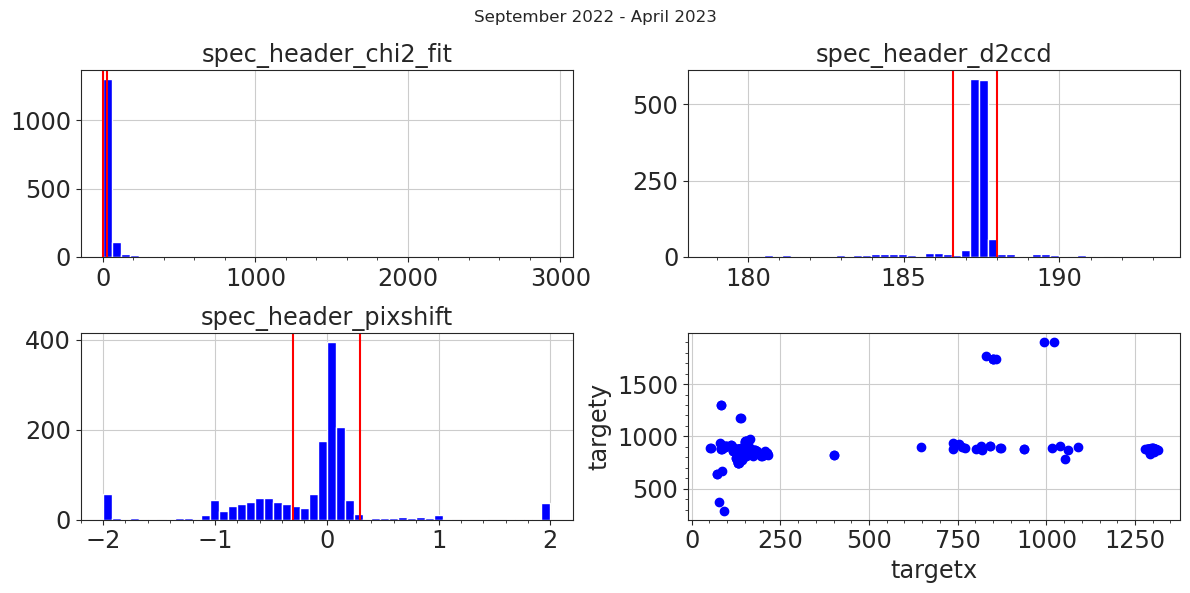

In [22]:
fig = plt.figure(figsize=(12,6))
axes = fig.subplots(2,2)
all_names = ['spec_header_chi2_fit','spec_header_d2ccd','spec_header_pixshift']
all_minval = [chi2_fit_min, d2ccd_min, pixshift_min ]
all_maxval = [chi2_fit_max, d2ccd_max, pixshift_max ]

for i, ax in enumerate(axes.flat):    
    if i <=2: 
        name = all_names[i]
        nbins=50
        values = df[name].values
        ax.hist(values,bins=nbins,facecolor="blue")
        ax.set_title(name)
        #ax.grid()
        ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
        ax.axvline(all_minval[i],color="r")
        ax.axvline(all_maxval[i],color="r")
        
    if i == 3:
        xval=df["spec_header_targetx"].values
        yval=df["spec_header_targety"].values
        ax.scatter(xval,yval,color="blue")
        ax.set_xlabel("targetx")
        ax.set_ylabel("targety")
        ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
        ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
        #ax.grid()
plt.suptitle(f"September 2022 - April 2023")
plt.tight_layout()
plt.show()    

In [23]:
df_cut1 = df[['spec_header_chi2_fit','spec_header_d2ccd','spec_header_pixshift','date_str']]
df_cut2 = df[['spec_header_targetx','spec_header_targety','date_str']]

/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-5.1.0/lib/python3.10/site-packages/seaborn/distributions.py:1185: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


<Figure size 1400x1400 with 0 Axes>

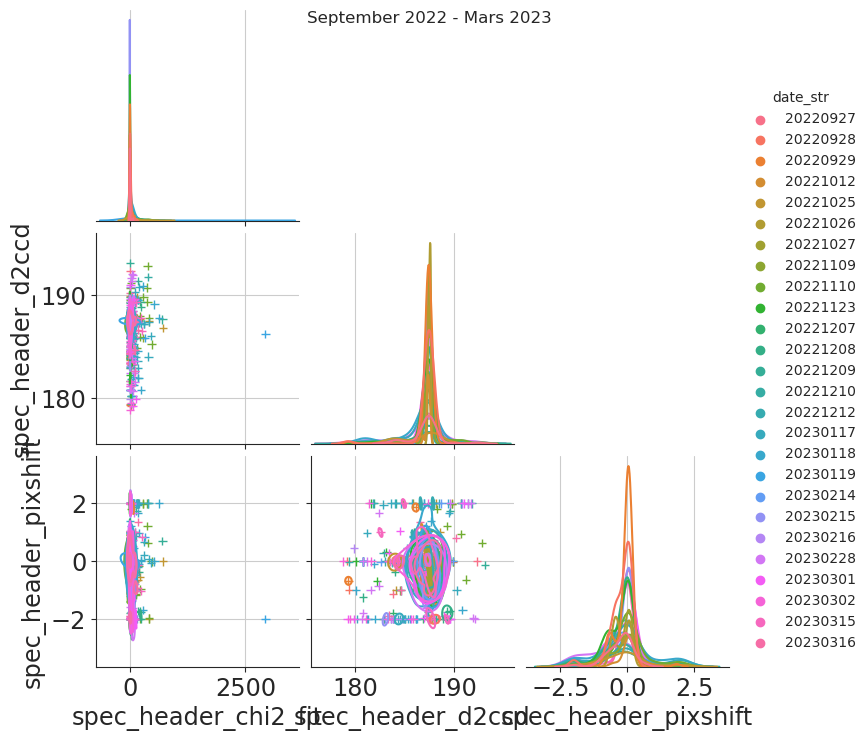

In [24]:
plt.figure(figsize=(14,14))
title = f"September 2022 - Mars 2023"
g=sns.pairplot(df_cut1,hue='date_str',corner=True,plot_kws=dict(marker="+", linewidth=1,color="b"),
             diag_kws=dict(color="r",fill=False),)
g.map_lower(sns.kdeplot, levels=3, color=".1")
plt.suptitle(title)
plt.show()

<Figure size 1600x1600 with 0 Axes>

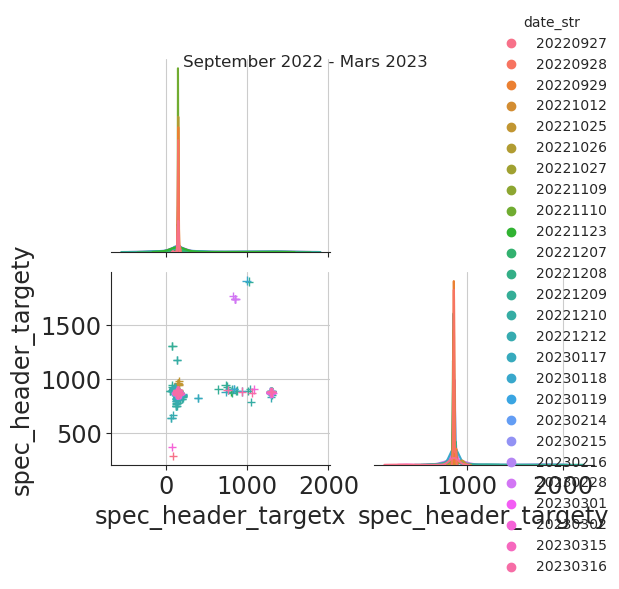

In [25]:
plt.figure(figsize=(16,16))
sns.pairplot(df_cut2,hue='date_str',corner=True,plot_kws=dict(marker="+", linewidth=1,color="b"),
             diag_kws=dict(color="r",fill=False),)
plt.tight_layout()
plt.suptitle(title)
plt.show()

Text(0.5, 1.0, 'date = September 22 - Mars 2023 , d2ccd_median = 187.40 ')

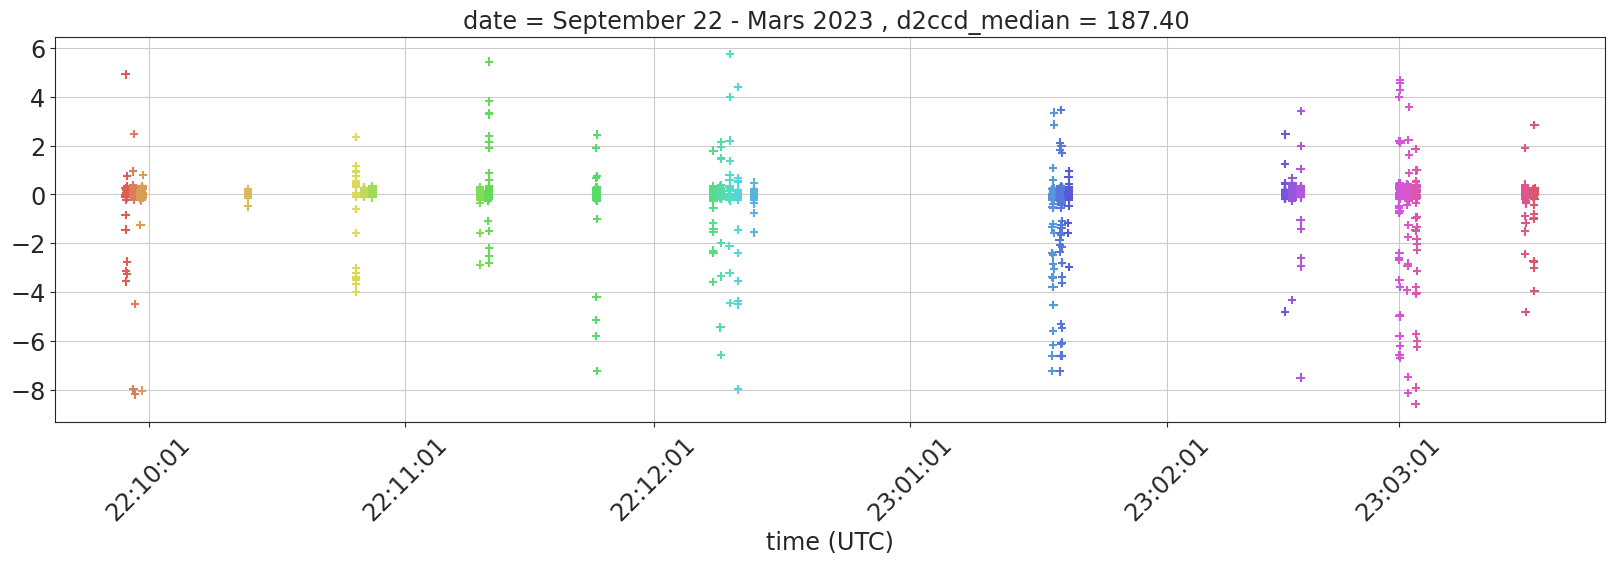

In [26]:
d2ccd_median = df["spec_header_d2ccd"].median()
df["d2ccd_shift"] = df["spec_header_d2ccd"]-d2ccd_median

fig=plt.figure(figsize=(20,5))
    
ax=fig.add_subplot(111)
myFmt = mdates.DateFormatter('%y:%m:%d')
ax.xaxis.set_major_formatter(myFmt)

    
ax.scatter(all_datetime,df["d2ccd_shift"],marker='+',color=all_colors)
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_tick_params(rotation=45)
ax.set_xlabel("time (UTC)")

title=f"date = September 22 - Mars 2023 , d2ccd_median = {d2ccd_median:.2f} "
ax.set_title(title)


(0.0, 100.0)

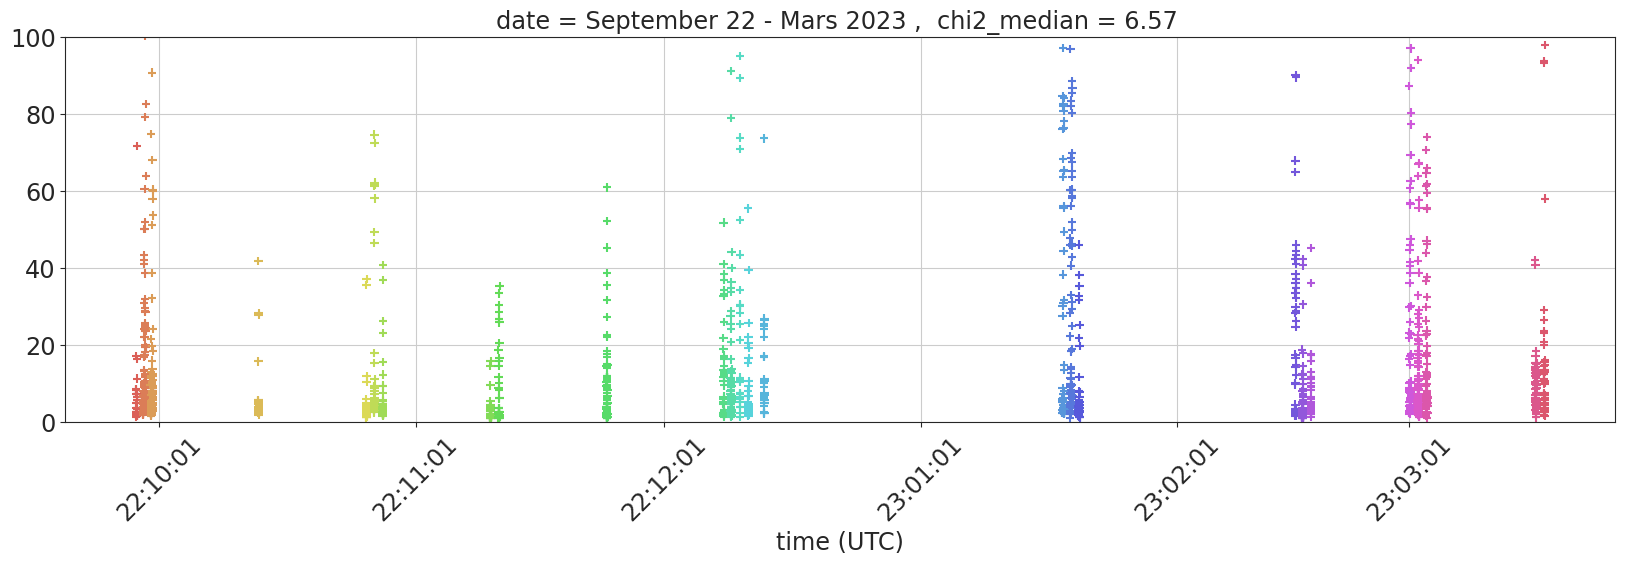

In [27]:
chi2_median = df["spec_header_chi2_fit"].median()

fig=plt.figure(figsize=(20,5))
    
ax=fig.add_subplot(111)
myFmt = mdates.DateFormatter('%y:%m:%d')
ax.xaxis.set_major_formatter(myFmt)

    
ax.scatter(all_datetime,df["spec_header_chi2_fit"],marker='+',color=all_colors)
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_tick_params(rotation=45)
ax.set_xlabel("time (UTC)")

title=f"date = September 22 - Mars 2023 ,  chi2_median = {chi2_median:.2f} "
ax.set_title(title)
ax.set_ylim(0,100)


#df.plot.bar(x="exposure", y="spec_header_chi2_fit",color="blue",title=f"date = {DATE}, chi2_median = {chi2_median:.2f} ",figsize=(18,3))

Text(0.5, 1.0, 'date = September 22 - Mars 2023 , pixshift_median = 0.000 ')

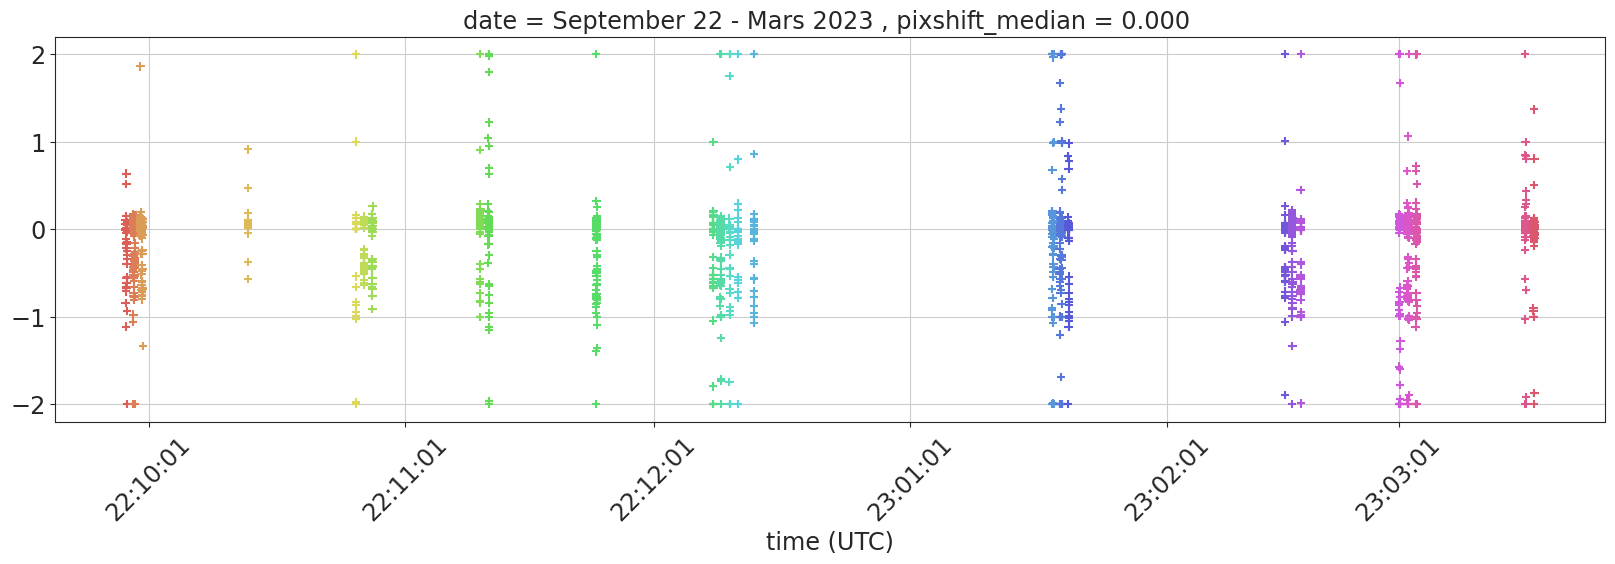

In [28]:
pixshift_median = df["spec_header_pixshift"].median()

#df.plot.bar(x="exposure", y="spec_header_pixshift",color="blue", title=f"date = {DATE}, pixshift_median = {pixshift_median:.3f}",figsize=(18,3))

fig=plt.figure(figsize=(20,5))
    
ax=fig.add_subplot(111)
myFmt = mdates.DateFormatter('%y:%m:%d')
ax.xaxis.set_major_formatter(myFmt)

    
ax.scatter(all_datetime,df["spec_header_pixshift"],marker='+',color=all_colors)
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_tick_params(rotation=45)
ax.set_xlabel("time (UTC)")

title=f"date = September 22 - Mars 2023 , pixshift_median = {pixshift_median:.3f} "
ax.set_title(title)
#ax.set_ylim(0,100)


In [29]:
df

,index,exposure,spec_date_obs,spec_target_label,spec_filter_label,spec_airmass,spec_pressure,spec_temperature,spec_humidity,spec_hour_angle,spec_parallactic_angle,spec_camera_angle,spec_order,spec_header_target,spec_header_redshift,spec_header_grating,spec_header_rotangle,spec_header_d2ccd,spec_header_lshift,spec_header_parangle,spec_header_targetx,spec_header_targety,spec_header_lbda_ref,spec_header_pixshift,spec_header_psf_reg,spec_header_trace_r,spec_header_chi2_fit,spec_header_a2_fit,spec_header_am_fit,spec_header_meanfwhm,spec_header_version,spec_header_rebin,spec_header_date-obs,spec_header_exptime,spec_header_airmass,spec_header_dec,spec_header_ha,spec_header_outtemp,spec_header_outpress,spec_header_outhum,spec_header_filter,spec_header_cam_rot,spec_header_s_x0,spec_header_s_y0,spec_header_s_xmin,spec_header_s_xmax,spec_header_s_ymin,spec_header_s_ymax,spec_header_s_nx,spec_header_s_ny,spec_header_s_dec,spec_header_s_sat,spec_spectrogram_x0,spec_spectrogram_y0,spec_spectrogram_xmin,spec_spectrogram_xmax,spec_spectrogram_ymin,spec_spectrogram_ymax,spec_spectrogram_deg,spec_spectrogram_saturation,spec_spectrogram_Nx,spec_spectrogram_Ny,me_az_rms,me_el_rms,me_rot_rms,me_image_az_rms,me_image_el_rms,me_image_rot_rms,date_str,date_num,date_index,d2ccd_shift
0,0,2022092700534,2022-09-28T05:17:00.004501045Z,HD42525,empty,1.830732,0,0,0,-76.365371,-91.285760,-87.540587,1,HD42525,0.000059,holo4_003,0.415308,187.671446,0.0,-91.285760,148.614527,860.499625,513.302114,-0.842913,2.904023e-03,286.579992,4.934932,1.0,1.830732,9.528476,2.4,2,2022-09-28T05:17:00.004501045Z,30.0,1.830732,-65.999014,-76.365371,0,0,0,empty,-87.540587,-418.892308,84.499625,569,1705,776,961,1136,185,2,22666.666667,-418.892308,84.499625,569,1705,776,961,2,22666.666667,1136,185,0.011623,0.074838,0.066441,0.009745,0.074838,0.000090,20220927,20220927,1,0.269372
1,1,2022092700535,2022-09-28T05:17:42.818994862Z,HD42525,empty,1.827189,0,0,0,-76.186504,-91.123347,-87.540459,1,HD42525,0.000059,holo4_003,0.407001,185.958512,0.0,-91.123347,150.480563,860.278187,513.302114,-0.000012,7.120328e-11,678.805452,7.155884,1.0,1.827189,10.671866,2.4,2,2022-09-28T05:17:42.818994862Z,30.0,1.827189,-65.999015,-76.186504,0,0,0,empty,-87.540459,-417.788241,84.278187,570,1707,776,961,1137,185,2,22666.666667,-417.788241,84.278187,570,1707,776,961,2,22666.666667,1137,185,0.011416,0.069099,0.058589,0.009564,0.069099,0.000080,20220927,20220927,1,-1.443562
2,2,2022092700546,2022-09-28T05:24:46.622992156Z,HD185975,empty,1.922195,0,0,0,-290.190975,71.199845,109.941048,1,HD185975,-0.000065,holo4_003,0.470658,187.397811,0.0,71.199845,162.275634,866.168447,597.257159,0.054723,3.732502e-01,182.929672,3.569781,1.0,1.922195,10.159259,2.4,2,2022-09-28T05:24:46.622992156Z,30.0,1.922195,-87.511618,-290.190975,0,0,0,empty,109.941048,-417.953650,84.168447,580,1716,782,967,1136,185,2,22666.666667,-417.953650,84.168447,580,1716,782,967,2,22666.666667,1136,185,0.011382,0.010147,0.084177,0.009729,0.010147,0.000114,20220927,20220927,1,-0.004263
3,3,2022092700547,2022-09-28T05:25:29.532001588Z,HD185975,empty,1.922606,0,0,0,-290.011746,71.380416,109.941229,1,HD185975,-0.000065,holo4_003,0.471939,187.293808,0.0,71.380416,164.222208,867.720241,597.257159,0.103227,2.102870e-01,186.149275,2.544129,1.0,1.922606,10.480197,2.4,2,2022-09-28T05:25:29.532001588Z,30.0,1.922606,-87.511608,-290.011746,0,0,0,empty,109.941229,-418.036611,83.720241,582,1718,784,969,1136,185,2,22666.666667,-418.036611,83.720241,582,1718,784,969,2,22666.666667,1136,185,0.008143,0.012577,0.141199,0.006961,0.012577,0.000192,20220927,20220927,1,-0.108266
4,4,2022092700557,2022-09-28T05:32:08.277495328Z,HD42525,empty,1.759066,0,0,0,-72.576395,-87.815261,268.965305,1,HD42525,0.000059,holo4_003,0.392250,192.322265,0.0,-87.815261,161.961157,859.476573,513.302114,-0.000883,4.976655e-11,740.076076,17.053464,1.0,1.759066,10.992531,2.4,2,2022-09-28T05:32:08.277495328Z,30.0,1.759066,-66.000288,-72.576395,0,0,0,empty,268.965305,-417.924744,84.476573,578,1

## Tracking

### Remove when no tracking info 

In [30]:
df["me_az_rms"].isnull().values.any()

True

In [31]:
# remove entries when no tracking info is available
df.loc[df["me_az_rms"].isnull(),'value_is_NaN'] = True
df.loc[df["me_az_rms"].notnull(), 'value_is_NaN'] = False

In [32]:
df[df["me_az_rms"] == -1.] 

,index,exposure,spec_date_obs,spec_target_label,spec_filter_label,spec_airmass,spec_pressure,spec_temperature,spec_humidity,spec_hour_angle,spec_parallactic_angle,spec_camera_angle,spec_order,spec_header_target,spec_header_redshift,spec_header_grating,spec_header_rotangle,spec_header_d2ccd,spec_header_lshift,spec_header_parangle,spec_header_targetx,spec_header_targety,spec_header_lbda_ref,spec_header_pixshift,spec_header_psf_reg,spec_header_trace_r,spec_header_chi2_fit,spec_header_a2_fit,spec_header_am_fit,spec_header_meanfwhm,spec_header_version,spec_header_rebin,spec_header_date-obs,spec_header_exptime,spec_header_airmass,spec_header_dec,spec_header_ha,spec_header_outtemp,spec_header_outpress,spec_header_outhum,spec_header_filter,spec_header_cam_rot,spec_header_s_x0,spec_header_s_y0,spec_header_s_xmin,spec_header_s_xmax,spec_header_s_ymin,spec_header_s_ymax,spec_header_s_nx,spec_header_s_ny,spec_header_s_dec,spec_header_s_sat,spec_spectrogram_x0,spec_spectrogram_y0,spec_spectrogram_xmin,spec_spectrogram_xmax,spec_spectrogram_ymin,spec_spectrogram_ymax,spec_spectrogram_deg,spec_spectrogram_saturation,spec_spectrogram_Nx,spec_spectrogram_Ny,me_az_rms,me_el_rms,me_rot_rms,me_image_az_rms,me_image_el_rms,me_image_rot_rms,date_str,date_num,date_index,d2ccd_shift,value_is_NaN
12,12,2022092700633,2022-09-28T07:05:19.112996492Z,HD031128,empty,1.12238,0,0,0,-30.703385,-104.147041,-75.860605,1,HD031128,0.000373,holo4_003,0.262782,187.385068,0.0,-104.147041,154.656476,866.895564,572.93915,-0.109907,1.447938,185.072867,2.036362,1.0,1.12238,6.76318,2.4,2,2022-09-28T07:05:19.112996492Z,30.0,1.12238,-27.025503,-30.703385,0,0,0,empty,-75.860605,-417.917616,88.895564,573,1710,778,963,1137,185,2,22666.666667,-417.917616,88.895564,573,1710,778,963,2,22666.666667,1137,185,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,20220927,20220927,1,-0.017006,False


In [33]:
df.loc[df["me_az_rms"]==-1.,'value_is_NaN'] = True

In [34]:
cut = 2.
df.loc[df["me_az_rms"]>cut ,'value_is_NaN'] = True
df.loc[df["me_el_rms"]>cut ,'value_is_NaN'] = True
df.loc[df["me_rot_rms"]>cut ,'value_is_NaN'] = True
df.loc[df["me_image_az_rms"]>cut ,'value_is_NaN'] = True
df.loc[df["me_image_el_rms"]>cut ,'value_is_NaN'] = True
df.loc[df["me_image_rot_rms"]>0.002 ,'value_is_NaN'] = True

### Select for tracking

In [35]:
df_tracking = df[df['value_is_NaN'] == False ]

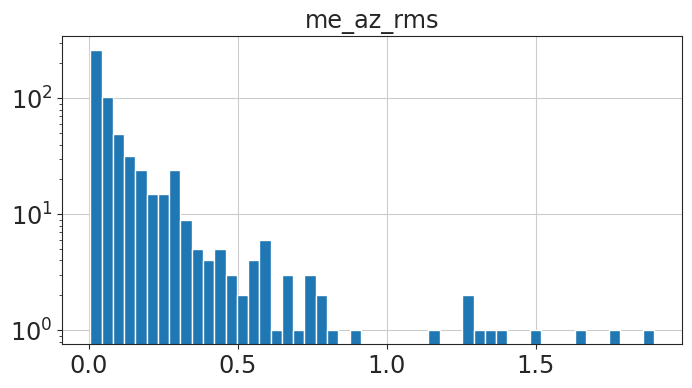

In [36]:
df_tracking.hist("me_az_rms",bins=50)
plt.yscale("log")

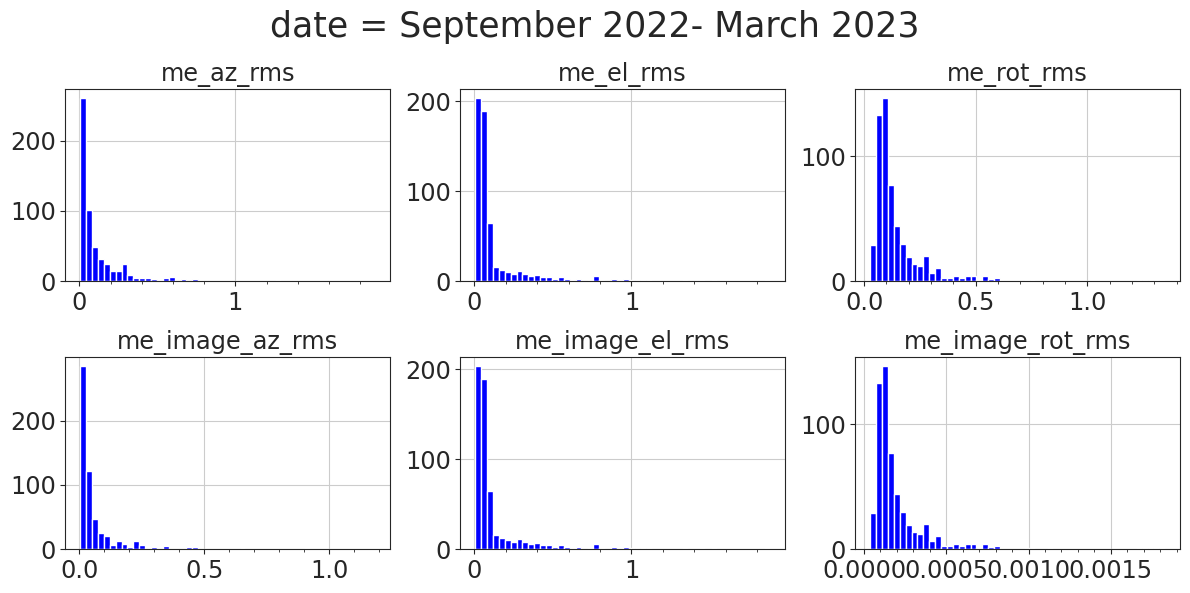

In [46]:
fig = plt.figure(figsize=(12,6))
axes = fig.subplots(2,3)
all_names = ["me_az_rms","me_el_rms","me_rot_rms","me_image_az_rms","me_image_el_rms","me_image_rot_rms"]

for i, ax in enumerate(axes.flat):    
    name = all_names[i]
    nbins=50
    values =  df_tracking[name].values
  
    ax.hist(values,bins=nbins,facecolor="blue")
    
    ax.set_title(name)
    #ax.grid()
    ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
    #ax.set_xlim(0,1.)
    
plt.suptitle(f"date = September 2022- March 2023",fontsize=25)    

plt.tight_layout()
plt.show()    

In [38]:
all_names_with_date = ["me_az_rms","me_el_rms","me_rot_rms","me_image_az_rms","me_image_el_rms","me_image_rot_rms","date_str"]
df_sel =df_tracking[all_names_with_date]

<Figure size 1400x1400 with 0 Axes>

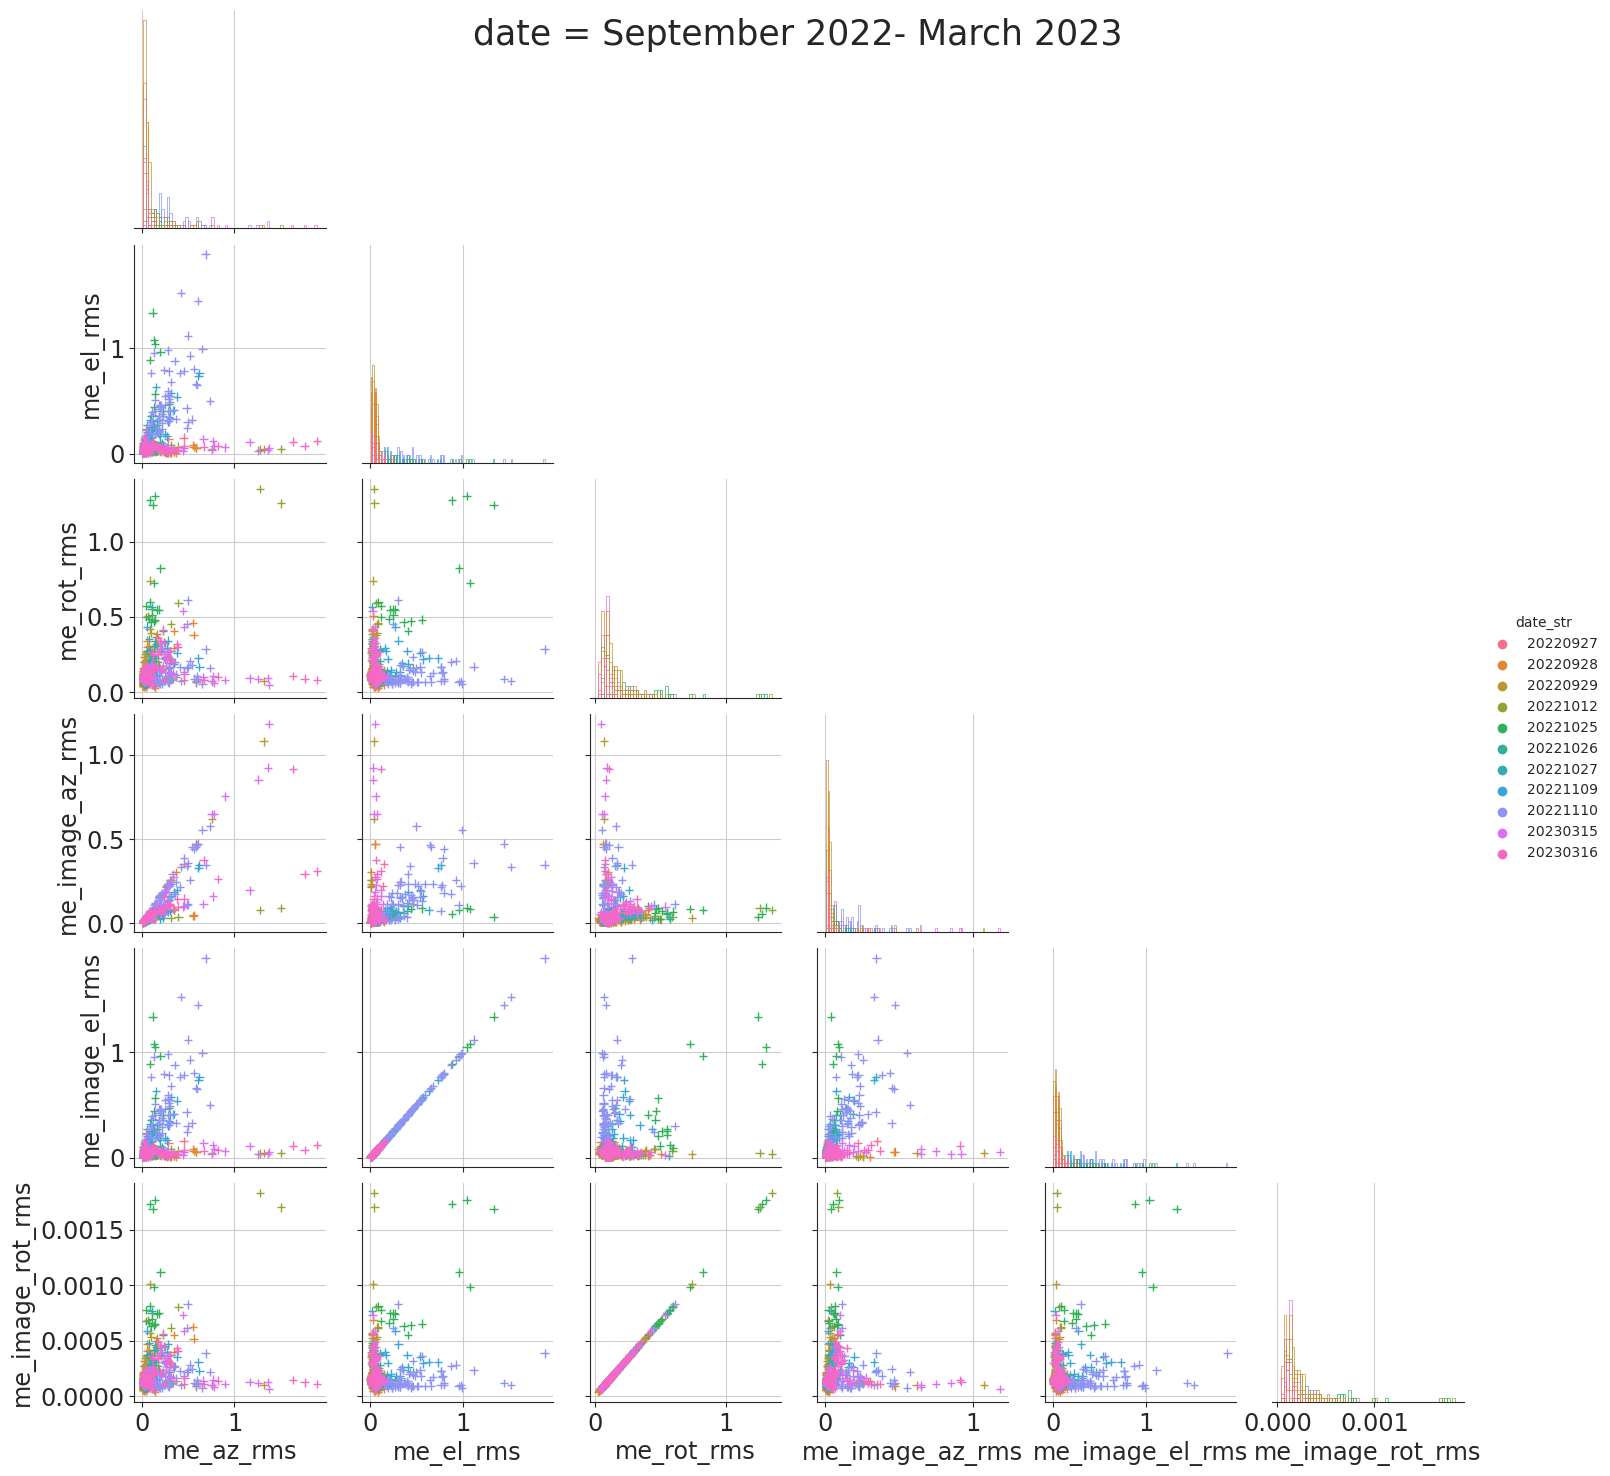

In [45]:
plt.figure(figsize=(14,14))
sns.pairplot(df_sel,hue='date_str',diag_kind="hist",corner=True,plot_kws=dict(marker="+", linewidth=1),
             diag_kws=dict(fill=False),)
plt.suptitle(f"date = September 2022- March 2023",fontsize=25)
plt.show()

# Selection of Bads and goods

In [40]:
df[~(cut1 & cut2 & cut3)]

,index,exposure,spec_date_obs,spec_target_label,spec_filter_label,spec_airmass,spec_pressure,spec_temperature,spec_humidity,spec_hour_angle,spec_parallactic_angle,spec_camera_angle,spec_order,spec_header_target,spec_header_redshift,spec_header_grating,spec_header_rotangle,spec_header_d2ccd,spec_header_lshift,spec_header_parangle,spec_header_targetx,spec_header_targety,spec_header_lbda_ref,spec_header_pixshift,spec_header_psf_reg,spec_header_trace_r,spec_header_chi2_fit,spec_header_a2_fit,spec_header_am_fit,spec_header_meanfwhm,spec_header_version,spec_header_rebin,spec_header_date-obs,spec_header_exptime,spec_header_airmass,spec_header_dec,spec_header_ha,spec_header_outtemp,spec_header_outpress,spec_header_outhum,spec_header_filter,spec_header_cam_rot,spec_header_s_x0,spec_header_s_y0,spec_header_s_xmin,spec_header_s_xmax,spec_header_s_ymin,spec_header_s_ymax,spec_header_s_nx,spec_header_s_ny,spec_header_s_dec,spec_header_s_sat,spec_spectrogram_x0,spec_spectrogram_y0,spec_spectrogram_xmin,spec_spectrogram_xmax,spec_spectrogram_ymin,spec_spectrogram_ymax,spec_spectrogram_deg,spec_spectrogram_saturation,spec_spectrogram_Nx,spec_spectrogram_Ny,me_az_rms,me_el_rms,me_rot_rms,me_image_az_rms,me_image_el_rms,me_image_rot_rms,date_str,date_num,date_index,d2ccd_shift,value_is_NaN
0,0,2022092700534,2022-09-28T05:17:00.004501045Z,HD42525,empty,1.830732,0,0,0,-76.365371,-91.285760,-87.540587,1,HD42525,0.000059,holo4_003,0.415308,187.671446,0.0,-91.285760,148.614527,860.499625,513.302114,-0.842913,2.904023e-03,286.579992,4.934932,1.0,1.830732,9.528476,2.4,2,2022-09-28T05:17:00.004501045Z,30.0,1.830732,-65.999014,-76.365371,0,0,0,empty,-87.540587,-418.892308,84.499625,569,1705,776,961,1136,185,2,22666.666667,-418.892308,84.499625,569,1705,776,961,2,22666.666667,1136,185,0.011623,0.074838,0.066441,0.009745,0.074838,0.000090,20220927,20220927,1,0.269372,False
1,1,2022092700535,2022-09-28T05:17:42.818994862Z,HD42525,empty,1.827189,0,0,0,-76.186504,-91.123347,-87.540459,1,HD42525,0.000059,holo4_003,0.407001,185.958512,0.0,-91.123347,150.480563,860.278187,513.302114,-0.000012,7.120328e-11,678.805452,7.155884,1.0,1.827189,10.671866,2.4,2,2022-09-28T05:17:42.818994862Z,30.0,1.827189,-65.999015,-76.186504,0,0,0,empty,-87.540459,-417.788241,84.278187,570,1707,776,961,1137,185,2,22666.666667,-417.788241,84.278187,570,1707,776,961,2,22666.666667,1137,185,0.011416,0.069099,0.058589,0.009564,0.069099,0.000080,20220927,20220927,1,-1.443562,False
4,4,2022092700557,2022-09-28T05:32:08.277495328Z,HD42525,empty,1.759066,0,0,0,-72.576395,-87.815261,268.965305,1,HD42525,0.000059,holo4_003,0.392250,192.322265,0.0,-87.815261,161.961157,859.476573,513.302114,-0.000883,4.976655e-11,740.076076,17.053464,1.0,1.759066,10.992531,2.4,2,2022-09-28T05:32:08.277495328Z,30.0,1.759066,-66.000288,-72.576395,0,0,0,empty,268.965305,-417.924744,84.476573,578,1715,775,960,1137,185,2,22666.666667,-417.924744,84.476573,578,1715,775,960,2,22666.666667,1137,185,0.024802,0.102973,0.049059,0.020424,0.102973,0.000067,20220927,20220927,1,4.920192,False
5,5,2022092700558,2022-09-28T05:32:51.092503150Z,HD42525,empty,1.755855,0,0,0,-72.397400,-87.649760,268.965287,1,HD42525,0.000059,holo4_003,0.390367,186.550750,0.0,-87.649760,158.753465,860.217397,513.302114,-0.006924,4.143573e-11,791.449252,8.270089,1.0,1.755855,10.818394,2.4,2,2022-09-28T05:32:51.092503150Z,30.0,1.755855,-66.000294,-72.397400,0,0,0,empty,268.965287,-417.585346,84.217397,578,1715,776,961,1137,185,2,22666.666667,-417.585346,84.217397,578,1715,776,961,2,22666.666667,1137,185,0.018448,0.134302,0.066974,0.015178,0.134302,0.000091,20220927,20220927,1,-0.851324,False
8,8,2022092700579,2022-09-28T05:47:11.873491883Z,HD42525,empty,1.694493,0,0,0,-68.807893,-84.298218,265.503651,1,HD42525,0.000059,holo4_003,0.376279,187.667225,0.0,-84.298218,154.044808,863.762560,513.302114,-0.655147,8.484476e-03,309.179372,8.338628,1.0,1.694493,7.763170,2.4,2,2022-09-28T05:47:11.873491883Z,30.0,1.694493,-66.000018,-68.807893,0,0,0,empty,265.503

In [41]:
df[(cut1 & cut2 & cut3)]

,index,exposure,spec_date_obs,spec_target_label,spec_filter_label,spec_airmass,spec_pressure,spec_temperature,spec_humidity,spec_hour_angle,spec_parallactic_angle,spec_camera_angle,spec_order,spec_header_target,spec_header_redshift,spec_header_grating,spec_header_rotangle,spec_header_d2ccd,spec_header_lshift,spec_header_parangle,spec_header_targetx,spec_header_targety,spec_header_lbda_ref,spec_header_pixshift,spec_header_psf_reg,spec_header_trace_r,spec_header_chi2_fit,spec_header_a2_fit,spec_header_am_fit,spec_header_meanfwhm,spec_header_version,spec_header_rebin,spec_header_date-obs,spec_header_exptime,spec_header_airmass,spec_header_dec,spec_header_ha,spec_header_outtemp,spec_header_outpress,spec_header_outhum,spec_header_filter,spec_header_cam_rot,spec_header_s_x0,spec_header_s_y0,spec_header_s_xmin,spec_header_s_xmax,spec_header_s_ymin,spec_header_s_ymax,spec_header_s_nx,spec_header_s_ny,spec_header_s_dec,spec_header_s_sat,spec_spectrogram_x0,spec_spectrogram_y0,spec_spectrogram_xmin,spec_spectrogram_xmax,spec_spectrogram_ymin,spec_spectrogram_ymax,spec_spectrogram_deg,spec_spectrogram_saturation,spec_spectrogram_Nx,spec_spectrogram_Ny,me_az_rms,me_el_rms,me_rot_rms,me_image_az_rms,me_image_el_rms,me_image_rot_rms,date_str,date_num,date_index,d2ccd_shift,value_is_NaN
2,2,2022092700546,2022-09-28T05:24:46.622992156Z,HD185975,empty,1.922195,0,0,0,-290.190975,71.199845,109.941048,1,HD185975,-0.000065,holo4_003,0.470658,187.397811,0.0,71.199845,162.275634,866.168447,597.257159,0.054723,0.373250,182.929672,3.569781,1.0,1.922195,10.159259,2.4,2,2022-09-28T05:24:46.622992156Z,30.0,1.922195,-87.511618,-290.190975,0,0,0,empty,109.941048,-417.953650,84.168447,580,1716,782,967,1136,185,2,22666.666667,-417.953650,84.168447,580,1716,782,967,2,22666.666667,1136,185,0.011382,0.010147,0.084177,0.009729,0.010147,0.000114,20220927,20220927,1,-0.004263,False
3,3,2022092700547,2022-09-28T05:25:29.532001588Z,HD185975,empty,1.922606,0,0,0,-290.011746,71.380416,109.941229,1,HD185975,-0.000065,holo4_003,0.471939,187.293808,0.0,71.380416,164.222208,867.720241,597.257159,0.103227,0.210287,186.149275,2.544129,1.0,1.922606,10.480197,2.4,2,2022-09-28T05:25:29.532001588Z,30.0,1.922606,-87.511608,-290.011746,0,0,0,empty,109.941229,-418.036611,83.720241,582,1718,784,969,1136,185,2,22666.666667,-418.036611,83.720241,582,1718,784,969,2,22666.666667,1136,185,0.008143,0.012577,0.141199,0.006961,0.012577,0.000192,20220927,20220927,1,-0.108266,False
6,6,2022092700568,2022-09-28T05:39:39.890492431Z,HD031128,empty,1.424795,0,0,0,-52.172476,-106.949346,-72.815335,1,HD031128,0.000373,holo4_003,0.350195,187.442959,0.0,-106.949346,151.966592,867.430052,572.939150,-0.046691,0.142787,223.423301,1.700667,1.0,1.424795,7.267940,2.4,2,2022-09-28T05:39:39.890492431Z,30.0,1.424795,-27.025458,-52.172476,0,0,0,empty,-72.815335,-417.851848,86.430052,570,1707,781,966,1137,185,2,22666.666667,-417.851848,86.430052,570,1707,781,966,2,22666.666667,1137,185,0.099051,0.108836,0.114324,0.070631,0.108836,0.000155,20220927,20220927,1,0.040886,False
7,7,2022092700569,2022-09-28T05:40:22.798504495Z,HD031128,empty,1.420954,0,0,0,-51.993220,-106.913753,-72.815350,1,HD031128,0.000373,holo4_003,0.352368,187.358956,0.0,-106.913753,152.504953,866.880471,572.939150,-0.155003,0.194844,199.931906,1.864317,1.0,1.420954,8.309790,2.4,2,2022-09-28T05:40:22.798504495Z,30.0,1.420954,-27.025407,-51.993220,0,0,0,empty,-72.815350,-417.174254,85.880471,570,1707,781,966,1137,185,2,22666.666667,-417.174254,85.880471,570,1707,781,966,2,22666.666667,1137,185,0.115297,0.119144,0.122171,0.081999,0.119144,0.000166,20220927,20220927,1,-0.043118,False
11,11,2022092700632,2022-09-28T07:04:36.300997130Z,HD031128,empty,1.123926,0,0,0,-30.882240,-104.152294,-75.860565,1,HD031128,0.000373,holo4_003,0.248463,187.335194,0.0,-104.152294,154.742946,869.212627,572.939150,0.012732,0.338162,217.258293,2.119252,1.0,1.123926,7.196738,2.4,2,2022-09-28T07:04:36.300997130Z,30.0,1.123926,-27.025513,-30.882240,0,0,0,empty,-75.860565,